**You must run this notebook in your local machine to print your credentials**

In [1]:
import datetime
import socket

# Get local time
local_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Get computer ID or hostname
computer_id = socket.gethostname()

# Print output with local time and computer ID
print('Assignment 1: Solutions by Neha') # Please change your name here
print('Local Time:', local_time)
print('Computer ID:', computer_id)

Assignment 1: Solutions by Neha
Local Time: 2024-05-12 20:06:04
Computer ID: Neha


Question 1
**Follow the instructions in slack**

In [57]:
# Import Libraries Pandas, NumPy, Geopandas, Matplotlib, Seaborn
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
## Your code down ##

# Get the excel data into Dataframes
df1 = pd.read_csv('C:/Users/nsain/Downloads/df_1.csv')
df2 = pd.read_csv('C:/Users/nsain/Downloads/df_2.csv')

# Concatenate the two DataFrames
combined_df = pd.concat([df1, df2], ignore_index=True)
# Convert to upper letter and remove extra spaces
combined_df['RM'] = combined_df['RM'].str.upper().str.strip()
# Remove points or dots
combined_df.RM = combined_df.RM.str.replace('.', '')
# Remove duplicates
cleaned_df['RM'] = combined_df['RM'].drop_duplicates()
# Get Unique values
cleaned_df['RM'] = cleaned_df['RM'].unique()
# Get Unique values and its count
cleaned_df['RM']

0               WINNIPEG
1       BIFROST-RIVERTON
2       EMERSON-FRANKLIN
3               ROCKWOOD
4              ARMSTRONG
             ...        
912    STRATHCONA COUNTY
917                TABER
920      UNORG TERRITORY
938     WOODLANDS COUNTY
940    YELLOWHEAD COUNTY
Name: RM, Length: 497, dtype: object

Question 2
**Merge Shapefile(provided in Cohort 6 Repo) and create a map by using DataFrame.plot() with cleaned and maximized number of RMs in df_1**

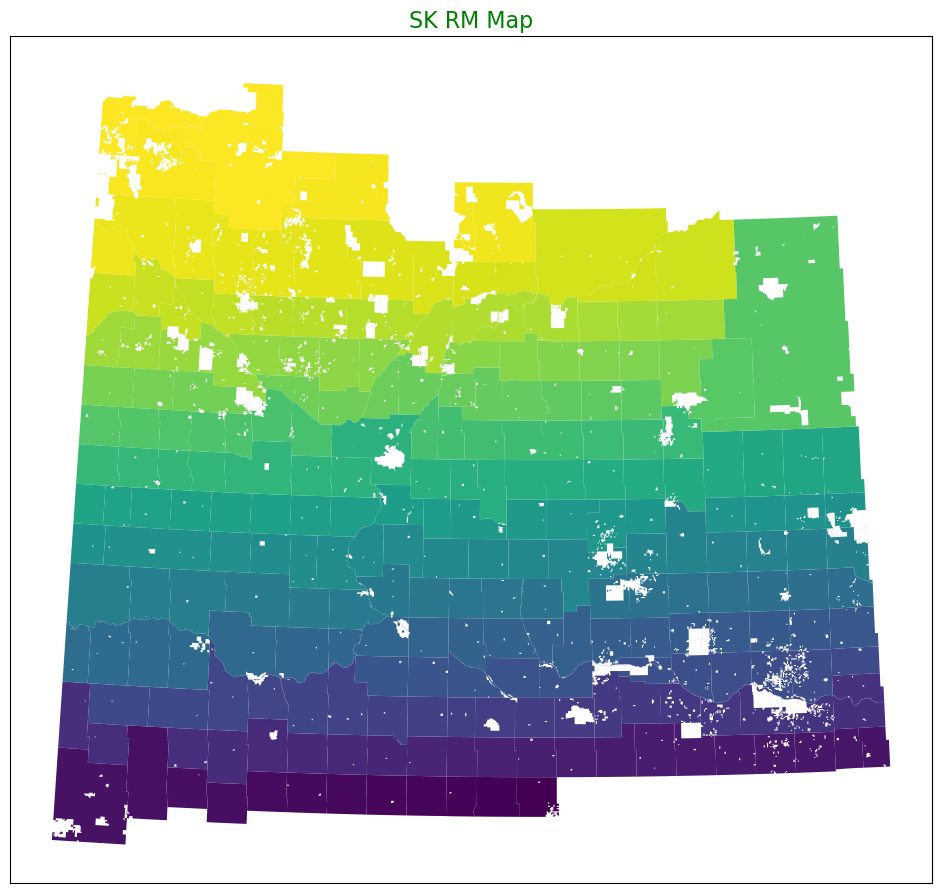

In [65]:
# Read the shapefile
shapefile = "C:/Users/nsain/Downloads/RM_shapefile/RuralMunicipality.shp"
gdf = gpd.read_file(shapefile)

# Took the clean data from question 1 by taking only digits as instructed in class
rmd=cleaned_df[cleaned_df['RM'].astype(str).str.isdigit()]

# Drop duplicates
rmd = rmd['RM'].drop_duplicates()
# Merge the shapefile DataFrame (gdf) with the rural management data
merged = gdf.merge(rmd, how='left', left_on='RMNO', right_on='RM')
merged=merged.dropna(subset=["RM"])

# Plot the map
merged.plot(column='RM', cmap='viridis', figsize=(15, 11), legend=False)
# Set title and axis
plt.title('SK RM Map', color='green', size=16)
plt.xticks([])
plt.yticks([])
plt.show()